# Capstone Project on Predicting Credit Card Approvals

#**Introduction:**
Credit cards are a popular financial tool that offer a convenient way to make purchases and build credit. However, getting approved for a credit card can be challenging for some individuals due to factors such as income level and employment status. To increase the chances of approval, machine learning models can be used to predict credit card approval based on various factors. In this project, we will analyze the impact of different factors on credit card approval rates and build predictive models to improve the accuracy of credit card approval predictions.


**Attribute Descriptions:**

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size

Label: 0 is application approved and 1 is application rejected.

  **1. Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?**
  
Ans: Our proposal is important today because credit cards are used a lot as a financial tool. With more online shopping and transactions, credit cards are a popular way to pay. Banks need to quickly and accurately process credit card applications. Predicting a good client is important for a bank because it helps reduce the risk of not getting paid back and makes managing credit card accounts cheaper. Banks can use machine learning to analyze things like income and job status to predict which clients are less risky. This can lead to better profits for the bank and happier customers.


**2. How is it going to impact the banking sector?**

Ans: Impact of machine learning models to predict credit card approval in the banking sector:

1. *Improved efficiency:* Machine learning models can process large amounts of data quickly and accurately, allowing banks to process credit card applications more efficiently.

2. *Enhanced decision-making:* Machine learning models can analyze a wide range of factors and identify the most important ones that influence credit card approval, helping banks to make more informed and accurate decisions.

3. *Improved profitability:* By accurately predicting credit card approval, banks can offer credit cards to clients with lower risk profiles, which can ultimately lead to better profitability.

4. *Enhanced customer satisfaction*: By offering credit cards to clients with lower risk profiles, banks can improve customer satisfaction and encourage repeat business.

**3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.**

Ans: The proposed method addresses a knowledge gap in credit card approval processes in Indian banks. Traditional methods may fall short in accurately assessing creditworthiness. Our machine learning approach offers a data-driven solution to evaluate factors like income and employment status, enhancing approval predictions. In the future, this method can help Indian banks make more informed decisions, adapt to changing economic landscapes, and minimize credit default risks, ultimately leading to better credit management.However, to fully leverage the benefits of our proposed method, banks will need to ensure that they have access to reliable and comprehensive data sources.

In [80]:
#Importing necessarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [81]:
#loading the data set
df=pd.read_csv("/content/Credit_card.csv")
df1=pd.read_csv("/content/Credit_card_label.csv")

In [82]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [83]:
df1.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [84]:
#merging the data set
df=pd.merge(df,df1,on="Ind_ID")

In [85]:
df.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [86]:
# renaming the column names
df = df.rename(columns={'Ind_ID':'Ind_id', 'GENDER': 'Gender', 'CHILDREN': 'Children', 'EDUCATION': 'Education', 'EMAIL_ID':'Email_id','Birthday_count': 'Age','Employed_days':'Employed_exp'})

In [87]:
df.info()#Information about the Columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1526 non-null   float64
 11  Employed_exp     1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_id         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [88]:
df.shape # shape of data set

(1548, 19)

In [89]:
df.describe()  #Finding the mean, min, max, and std deviation

,Ind_id,Children,Annual_income,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [90]:
df.duplicated().sum()# Check for duplicate rows

0

In [91]:
df.isnull().sum() #Finding null values

Ind_id               0
Gender               7
Car_Owner            0
Propert_Owner        0
Children             0
Annual_income       23
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Age                 22
Employed_exp         0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_id             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [92]:
# Filling or Imputing the null values with mean values
df['Annual_income'].fillna(df['Annual_income'].mean(), inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [93]:
# Deleting the null values in the Gender column
df=df.dropna(subset=["Gender"])

In [94]:
# Replacing missing values
df['Type_Occupation'].fillna('Not-Specified',inplace=True)

In [95]:
df['Type_Occupation'].unique()

array(['Not-Specified', 'Core staff', 'Cooking staff', 'Laborers',
       'Sales staff', 'Accountants', 'Managers', 'Cleaning staff',
       'Drivers', 'Low-skill Laborers', 'High skill tech staff',
       'IT staff', 'Waiters/barmen staff', 'Security staff',
       'Medicine staff', 'Private service staff', 'HR staff',
       'Secretaries', 'Realty agents'], dtype=object)

In [96]:
df.isnull().sum() #Finding null values

Ind_id             0
Gender             0
Car_Owner          0
Propert_Owner      0
Children           0
Annual_income      0
Type_Income        0
Education          0
Marital_status     0
Housing_type       0
Age                0
Employed_exp       0
Mobile_phone       0
Work_Phone         0
Phone              0
Email_id           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [97]:
# count the rows and columns
df.shape

(1541, 19)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1541 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1541 non-null   object 
 3   Propert_Owner    1541 non-null   object 
 4   Children         1541 non-null   int64  
 5   Annual_income    1541 non-null   float64
 6   Type_Income      1541 non-null   object 
 7   Education        1541 non-null   object 
 8   Marital_status   1541 non-null   object 
 9   Housing_type     1541 non-null   object 
 10  Age              1541 non-null   float64
 11  Employed_exp     1541 non-null   int64  
 12  Mobile_phone     1541 non-null   int64  
 13  Work_Phone       1541 non-null   int64  
 14  Phone            1541 non-null   int64  
 15  Email_id         1541 non-null   int64  
 16  Type_Occupation  1541 non-null   object 
 17  Family_Members


*   **Value count for columns**





In [99]:
for i in df:
  if df[i].dtype=="int":
    print(i,"\n",df[i].value_counts())
    print("---------")

Ind_id 
 5008827    1
5047870    1
5126518    1
5116633    1
5029082    1
          ..
5137407    1
5089896    1
5035418    1
5088836    1
5053790    1
Name: Ind_id, Length: 1541, dtype: int64
---------
Children 
 0     1086
1      303
2      134
3       16
4        1
14       1
Name: Children, dtype: int64
---------
Employed_exp 
  365243    260
-1678        5
-460         5
-1649        5
-3420        5
          ... 
-2959        1
-234         1
-719         1
-4410        1
-2859        1
Name: Employed_exp, Length: 953, dtype: int64
---------
Mobile_phone 
 1    1541
Name: Mobile_phone, dtype: int64
---------
Work_Phone 
 0    1220
1     321
Name: Work_Phone, dtype: int64
---------
Phone 
 0    1066
1     475
Name: Phone, dtype: int64
---------
Email_id 
 0    1399
1     142
Name: Email_id, dtype: int64
---------
Family_Members 
 2     799
1     332
3     266
4     127
5      15
6       1
15      1
Name: Family_Members, dtype: int64
---------
label 
 0    1371
1     170
Name: lab

In [100]:
for i in df:
  if df[i].dtype=="float":
    print(i,"\n",df[i].value_counts())
    print("---------")

Annual_income 
 135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    118
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: Annual_income, Length: 116, dtype: int64
---------
Age 
 -16040.342071    22
-14523.000000     5
-22655.000000     5
-21363.000000     5
-18173.000000     4
                 ..
-19532.000000     1
-22861.000000     1
-20195.000000     1
-17738.000000     1
-16601.000000     1
Name: Age, Length: 1267, dtype: int64
---------


In [101]:
for i in df:
  if df[i].dtype=="object":
    print(i,"\n",df[i].value_counts())
    print("---------")

Gender 
 F    973
M    568
Name: Gender, dtype: int64
---------
Car_Owner 
 N    922
Y    619
Name: Car_Owner, dtype: int64
---------
Propert_Owner 
 Y    1007
N     534
Name: Propert_Owner, dtype: int64
---------
Type_Income 
 Working                 795
Commercial associate    364
Pensioner               267
State servant           115
Name: Type_Income, dtype: int64
---------
Education 
 Secondary / secondary special    1029
Higher education                  421
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: Education, dtype: int64
---------
Marital_status 
 Married                 1044
Single / not married     226
Civil marriage           101
Separated                 95
Widow                     75
Name: Marital_status, dtype: int64
---------
Housing_type 
 House / apartment      1374
With parents             79
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartmen

#Binary Features
*   Gender                       
*   Car_Owner
*   Propert_Owner
*   Work_Phone
*   Email_id
*   label



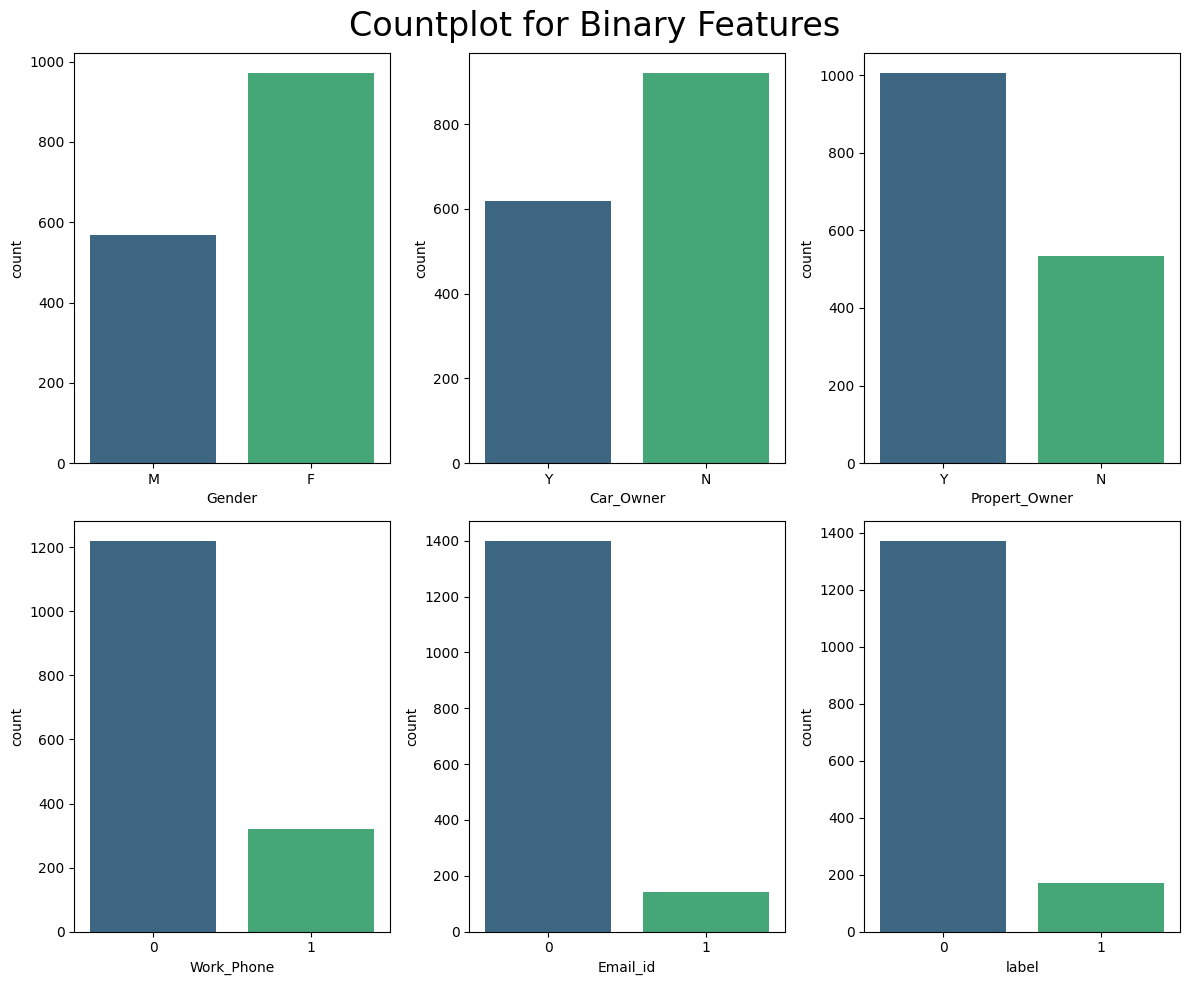

In [102]:
plt.figure(figsize=(12,10))
plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=df, palette='viridis')

plt.subplot(2, 3, 2)
sns.countplot(x='Car_Owner', data=df, palette='viridis')

plt.subplot(2, 3, 3)
sns.countplot(x='Propert_Owner', data=df, palette='viridis')

plt.subplot(2, 3, 4)
sns.countplot(x='Work_Phone', data=df, palette='viridis')

plt.subplot(2, 3, 5)
sns.countplot(x='Email_id', data=df, palette='viridis')

plt.subplot(2, 3, 6)
sns.countplot(x='label', data=df, palette='viridis')

plt.suptitle("Countplot for Binary Features", fontsize=24)

plt.tight_layout()
plt.show()


**Encoding:**

In [103]:
# Mappings
mappings={
    "Gender":{"M":1,"F":0},
    "Car_Owner":{"Y":1,"N":0},
    "Propert_Owner":{"Y":1,"N":0}
}

In [104]:
# Apply mappings to DataFrame
for col, mapping in mappings.items():
    df[col] = df[col].map(mapping)


In [105]:
df.head()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,Not-Specified,2,1
1,5009744,0,1,0,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,Not-Specified,2,1
2,5009746,0,1,0,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,Not-Specified,2,1
3,5009749,0,1,0,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,Not-Specified,2,1
4,5009752,0,1,0,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,Not-Specified,2,1


# Categorical Features:

*   Housing_type

*   Type_Income

*   Education
*   Marital_status


*   Type_Occupation






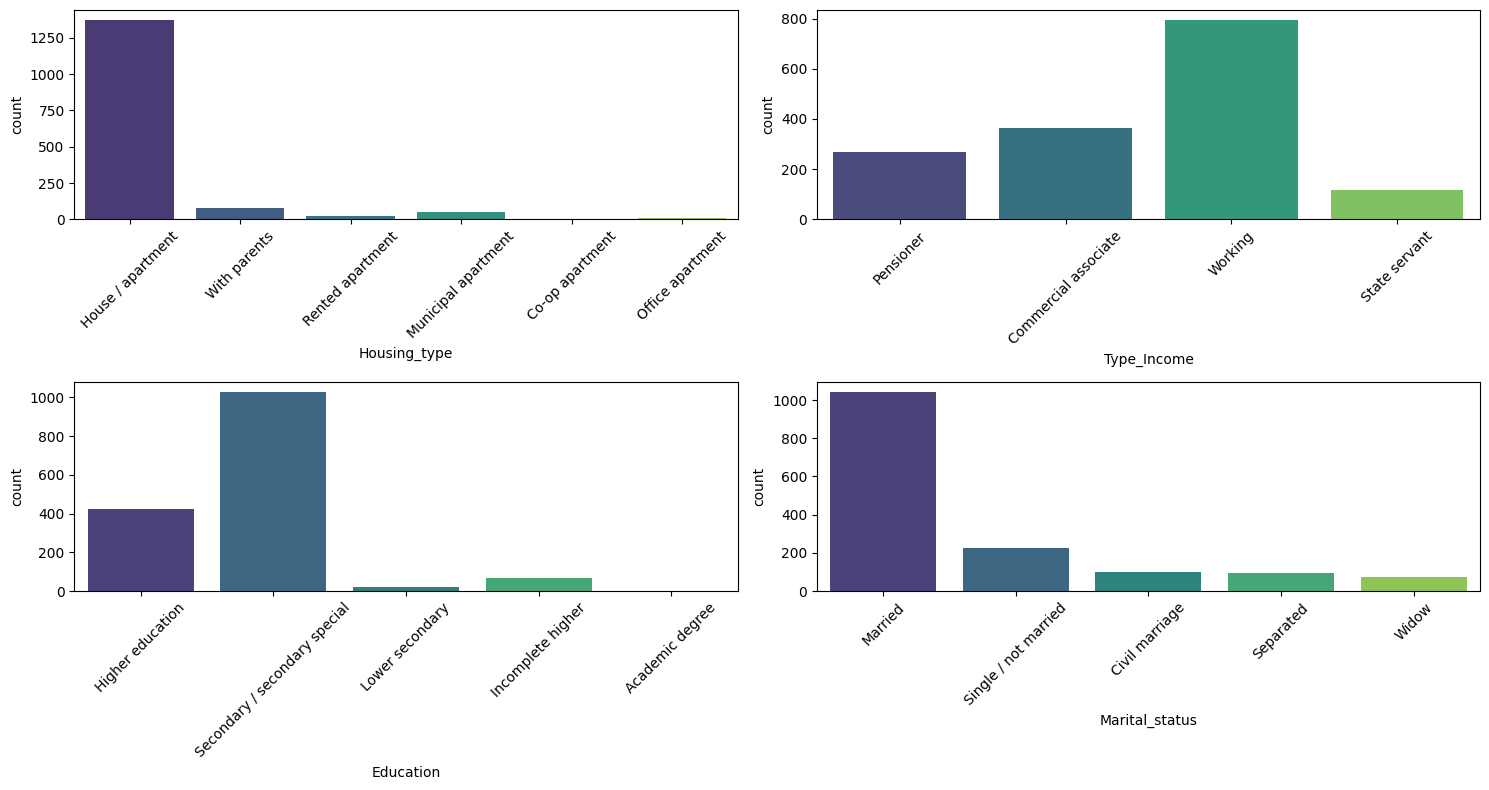

In [106]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.countplot(x=df["Housing_type"],palette='viridis')
plt.xticks(rotation = 45)
plt.subplot(2,2,2)
sns.countplot(x=df["Type_Income"],palette='viridis')
plt.xticks(rotation = 45)
plt.subplot(2,2,3)
sns.countplot(x=df["Education"],palette='viridis')
plt.xticks(rotation = 45)
plt.subplot(2,2,4)
sns.countplot(x='Marital_status', data=df, palette='viridis')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()



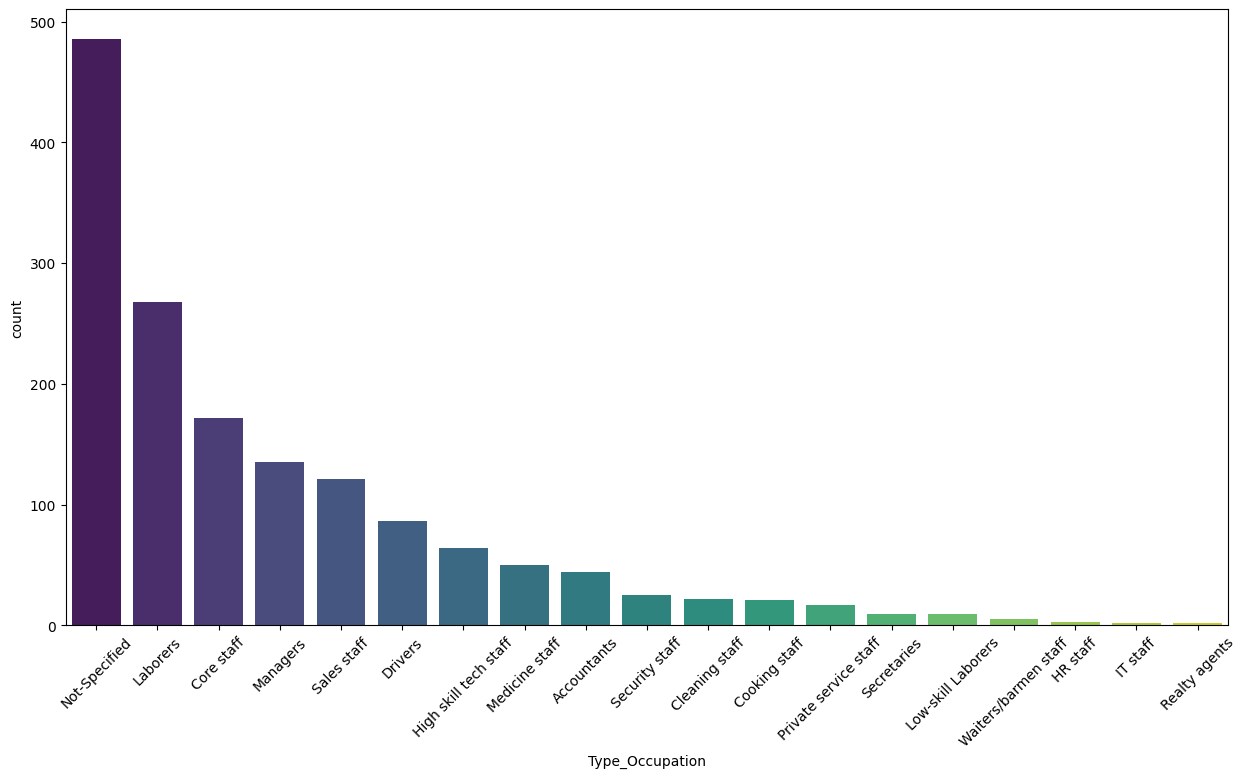

In [107]:
plt.figure(figsize=(15,8))
sorted_counts=df["Type_Occupation"].value_counts().sort_values(ascending=False)
sns.countplot(x=df["Type_Occupation"],order=sorted_counts.index,palette='viridis')
plt.xticks(rotation = 45)
plt.show()


#Continuous Features:

*   Children

*   Family_Members

*   Age
*   Annual_income


*   Employed_exp








In [108]:
cont_var = df[['Children', 'Family_Members', 'Age', 'Annual_income', 'Employed_exp']]

for i in cont_var:
    print(i,"\n",df[i].value_counts())
    print("---------")

Children 
 0     1086
1      303
2      134
3       16
4        1
14       1
Name: Children, dtype: int64
---------
Family_Members 
 2     799
1     332
3     266
4     127
5      15
6       1
15      1
Name: Family_Members, dtype: int64
---------
Age 
 -16040.342071    22
-14523.000000     5
-22655.000000     5
-21363.000000     5
-18173.000000     4
                 ..
-19532.000000     1
-22861.000000     1
-20195.000000     1
-17738.000000     1
-16601.000000     1
Name: Age, Length: 1267, dtype: int64
---------
Annual_income 
 135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    118
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: Annual_income, Length: 116, dtype: int64
---------
Employed_exp 
  365243    260
-1678        5
-460         5
-1649        5
-3420        5
          ... 
-2959        1
-234         1
-719         1
-4410        1
-2859        1
Name: Employed_exp, Length: 953, dtype: int64
---

From the following information we can see that Age and Employed_exp is in negative and not in correct Form.

In [109]:
# converting the negative values to actual age
df['Age']=abs(round((df['Age']/-365)))
# converting negative values to exprience of the employee
df['Employed_exp']=abs(round((df['Employed_exp']/-365)))

In [110]:
df['Age'].unique()

array([51., 37., 44., 61., 50., 52., 24., 46., 35., 33., 49., 43., 60.,
       55., 29., 36., 56., 58., 65., 53., 64., 42., 30., 32., 26., 28.,
       45., 67., 25., 57., 59., 38., 31., 40., 34., 47., 41., 63., 54.,
       48., 62., 27., 39., 66., 23., 68., 22., 21.])

In [111]:
df['Employed_exp'].value_counts()

1001.0    260
2.0       131
1.0       129
4.0       121
3.0       118
5.0       107
6.0        91
7.0        82
9.0        66
8.0        61
10.0       60
0.0        44
11.0       31
15.0       31
12.0       26
14.0       25
13.0       20
19.0       18
20.0       15
17.0       14
21.0       12
16.0       11
22.0       10
18.0       10
23.0        9
24.0        5
29.0        5
27.0        5
26.0        5
31.0        4
33.0        3
25.0        2
35.0        2
34.0        2
32.0        1
41.0        1
37.0        1
38.0        1
28.0        1
36.0        1
Name: Employed_exp, dtype: int64

In [112]:
# replacing the extreme values(1001.0) with zero.
df['Employed_exp'].replace(1001.0, 0,inplace=True)

In [113]:
df['Employed_exp'].unique()

array([ 0.,  2.,  3.,  1.,  7.,  5., 12., 13., 10.,  4., 20.,  6., 11.,
        9., 23.,  8., 14., 19., 22., 21., 17., 26., 24., 15., 16., 34.,
       37., 27., 41., 35., 18., 31., 32., 25., 29., 38., 33., 28., 36.])

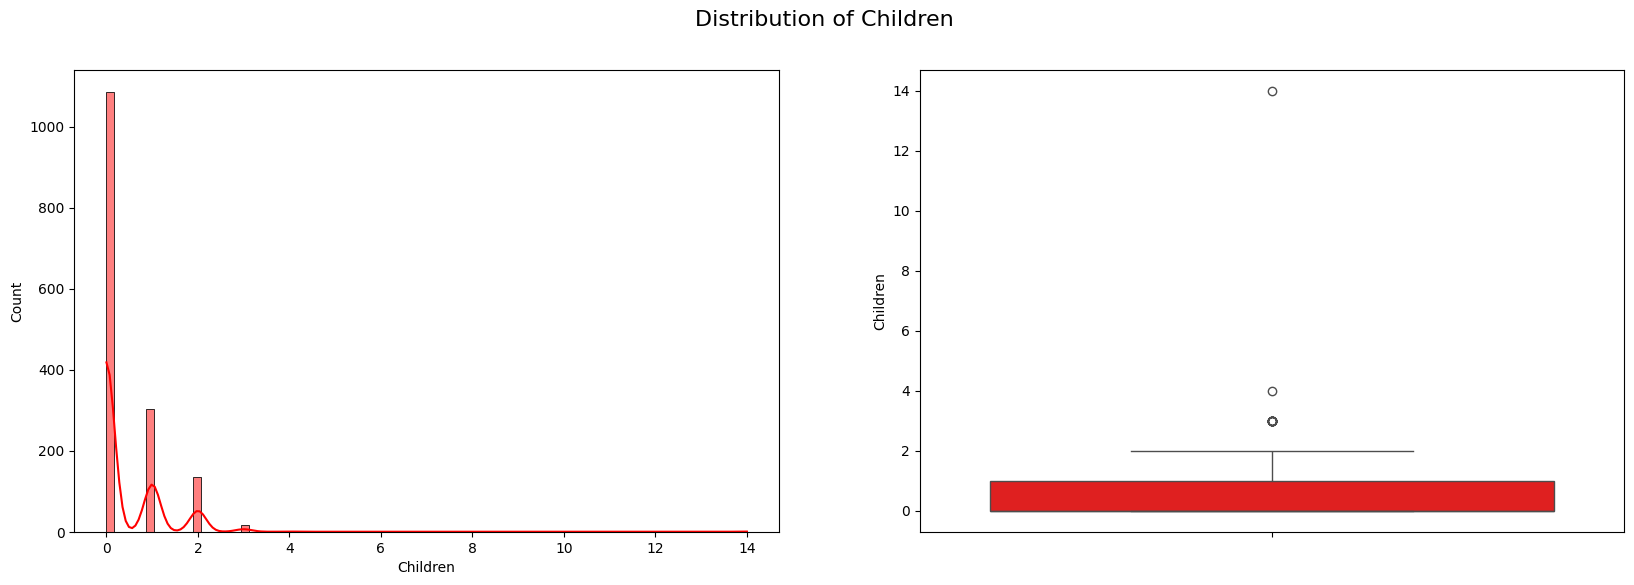

In [114]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(df["Children"],kde="True",color="Red")
plt.subplot(1,2,2)
sns.boxplot(df["Children"],color="Red")
plt.suptitle("Distribution of Children", fontsize=16)
plt.show()

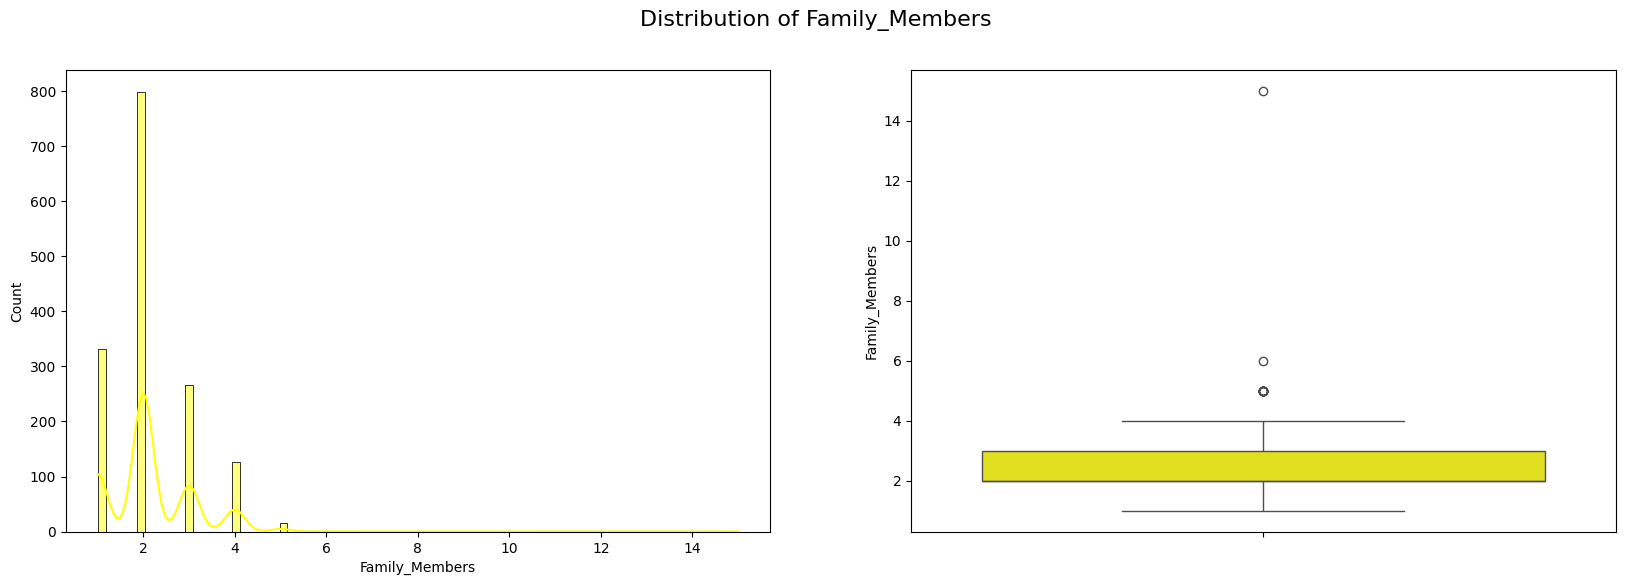

In [115]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(df["Family_Members"],kde="True",color="Yellow")
plt.subplot(1,2,2)
sns.boxplot(df["Family_Members"],color="Yellow")
plt.suptitle("Distribution of Family_Members", fontsize=16)
plt.show()

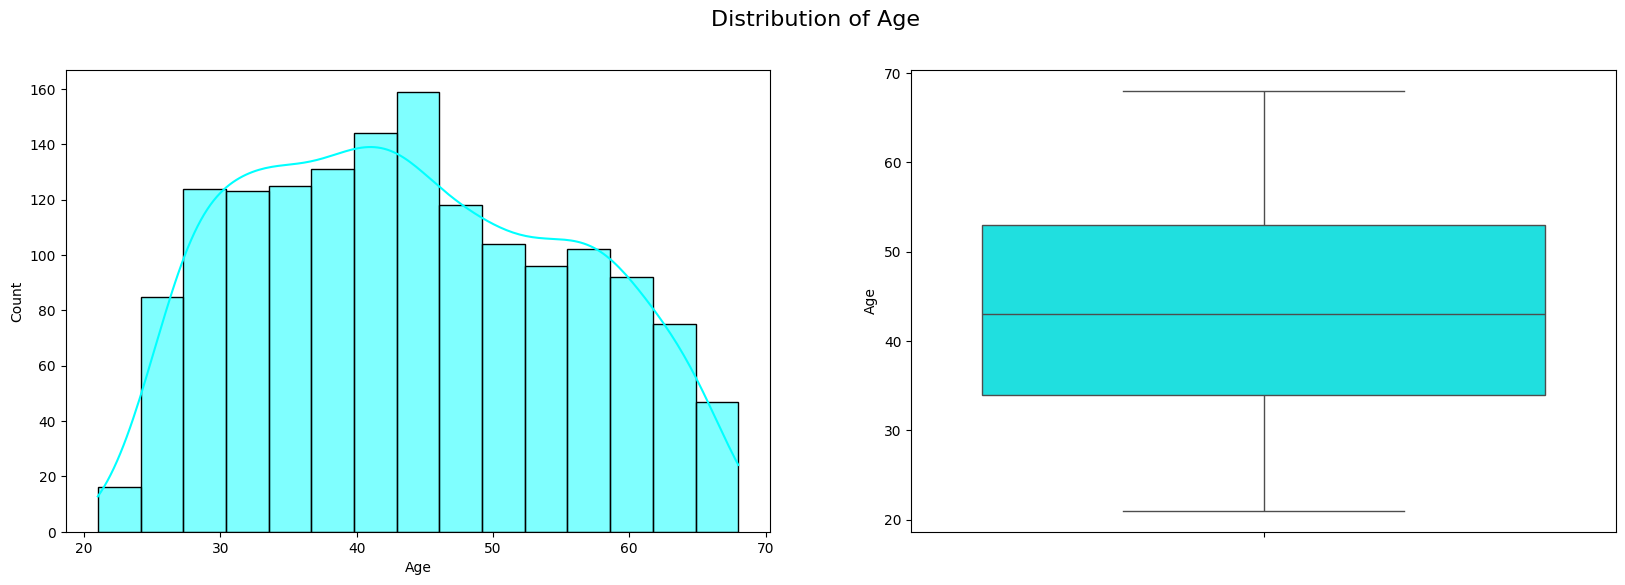

In [116]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(df["Age"],kde="True",color="cyan")
plt.subplot(1,2,2)
sns.boxplot(df["Age"],color="cyan")
plt.suptitle("Distribution of Age", fontsize=16)
plt.show()

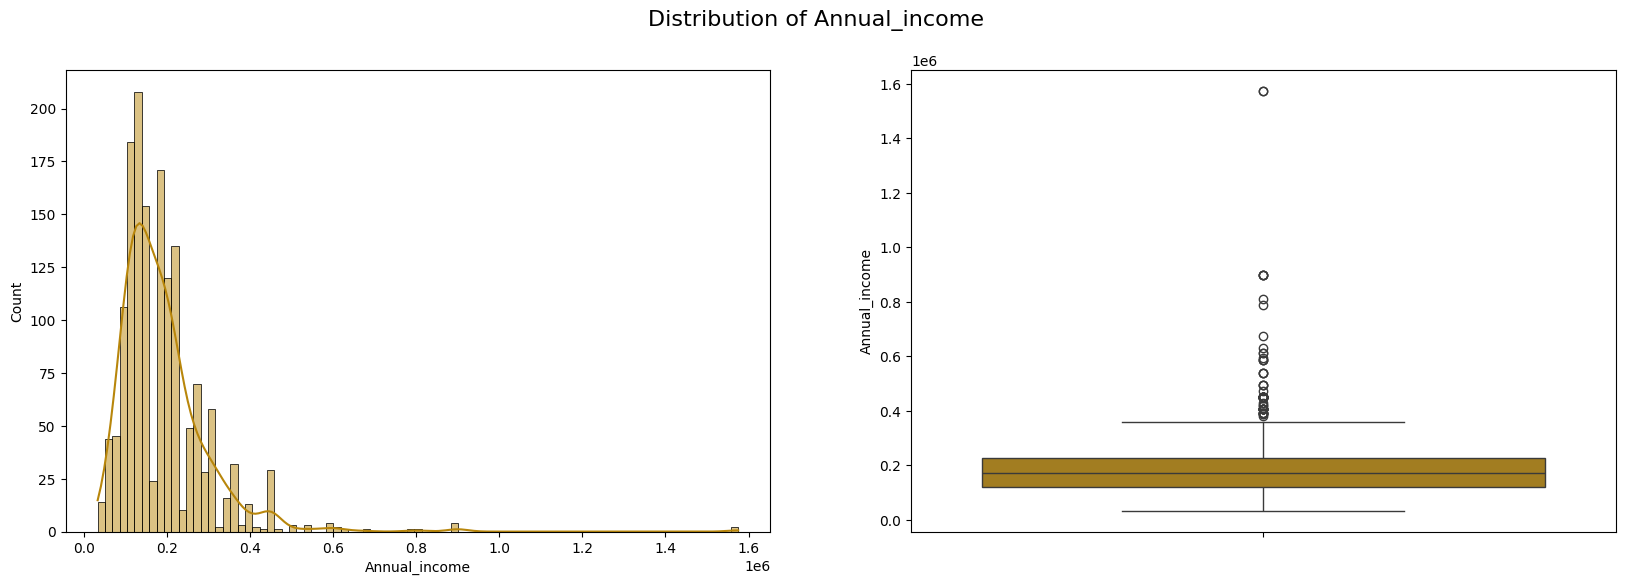

In [117]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(df["Annual_income"],kde="True",color='darkgoldenrod')
plt.subplot(1,2,2)
sns.boxplot(df["Annual_income"],color='darkgoldenrod')
plt.suptitle("Distribution of Annual_income", fontsize=16)
plt.show()

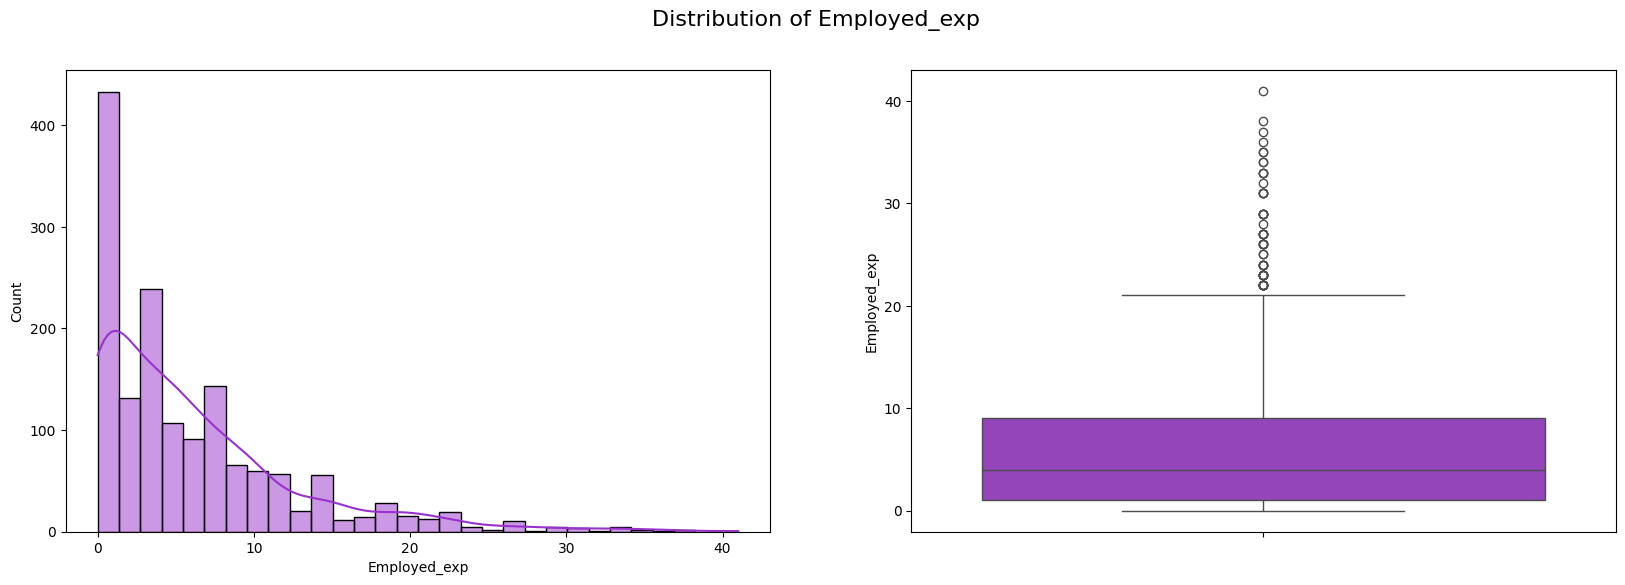

In [118]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(df["Employed_exp"],kde="True",color='darkorchid')
plt.subplot(1,2,2)
sns.boxplot(df["Employed_exp"],color='darkorchid')
plt.suptitle("Distribution of Employed_exp", fontsize=16)
plt.show()

# Outliers

In [119]:
#Treating outliers
columns_to_clip = ['Family_Members', 'Annual_income', 'Children', 'Employed_exp']

for col in columns_to_clip:
    #Calculating Quartiles
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    #Calculating interquartile range (IQR).
    IQR = Q3 - Q1

    #Determining Outlier Limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    #Clipping Outliers ,it clips the values in the current column to ensure they fall within the calculated lower and upper limits.
    df[col] = df[col].clip(lower_limit,upper_limit)




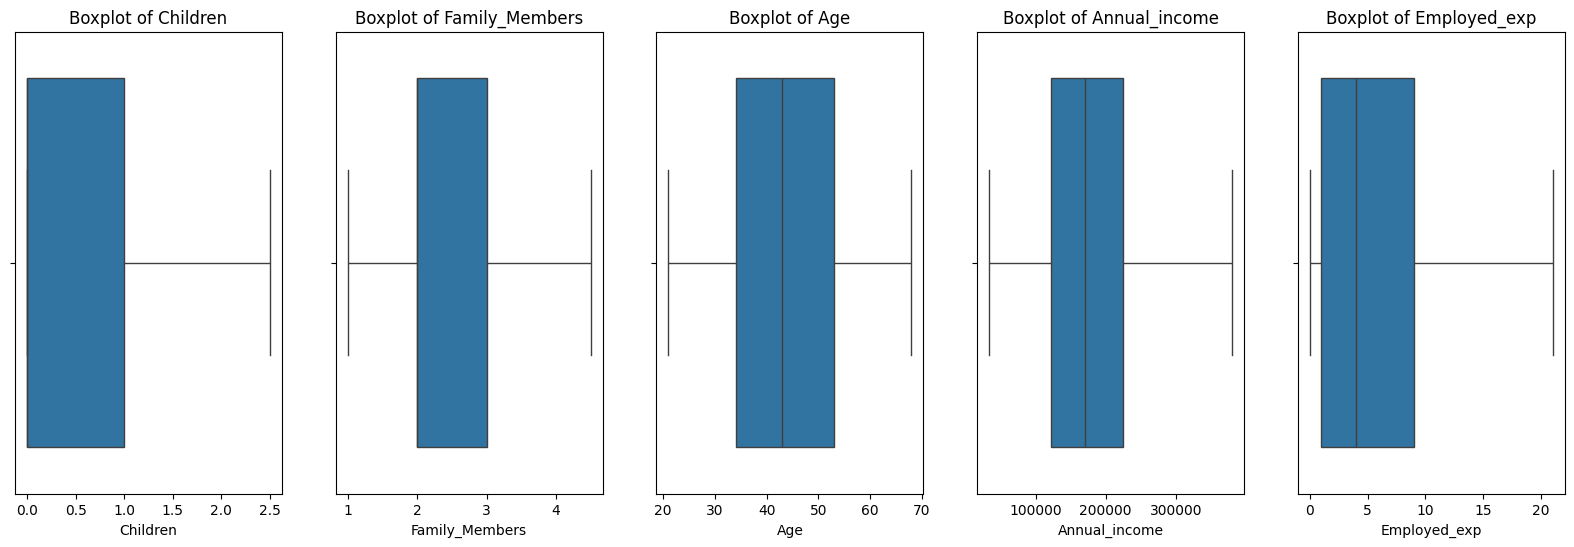

<Figure size 640x480 with 0 Axes>

In [120]:
#After removing Outliers
plt.figure(figsize=(20,6))
plt.subplot(1, 5, 1)
sns.boxplot(x='Children', data=df)
plt.title('Boxplot of Children')

plt.subplot(1, 5, 2)
sns.boxplot(x='Family_Members', data=df)
plt.title('Boxplot of Family_Members')

plt.subplot(1, 5, 3)
sns.boxplot(x='Age', data=df)
plt.title('Boxplot of Age')

plt.subplot(1, 5, 4)
sns.boxplot(x='Annual_income', data=df)
plt.title('Boxplot of Annual_income')

plt.subplot(1, 5, 5)
sns.boxplot(x='Employed_exp', data=df)
plt.title('Boxplot of Employed_exp')

plt.show()
plt.tight_layout()


<Axes: >

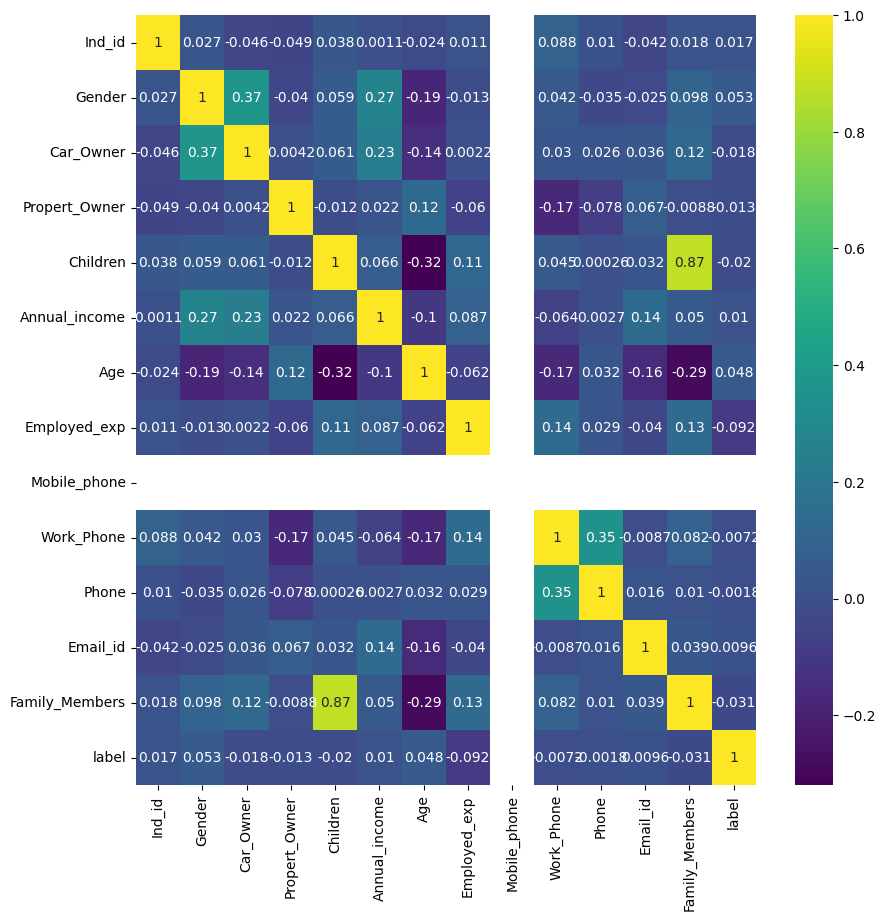

In [121]:
#Visualization of correlation using Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True,cmap='viridis')

# Initial Hypothesis (or hypotheses):

**Data Analysis Track:**

***Objective:*** Identify patterns in the data and important features that may impact a ML model.
Hypotheses:

***Income and Credit Approval:***We hypothesize that individuals with lower annual income are less likely to have their credit applications approved compare to high annual income.

***Justification:*** This hypothesis is based on the assumption that lower income levels may indicate higher risk for lenders, leading to a higher likelihood of credit application rejection. By analyzing the data, we aim to validate or refute this hypothesis and understand the impact of income on credit approval decisions.

**1.What approach are you going to take in order to prove or disprove your hypothesis?**

ans:*Hypothesis Testing*: To prove or disprove the hypothesis regarding income and credit approval, we will conduct statistical tests such as t-tests . These test will help us understand if there is a significant difference in credit approval rates between individuals with low and high annual incomes.


In [122]:
from scipy import stats

# DataFrame with 'Annual_income' and 'Credit_approval' columns
lower_income = df[df['Annual_income'] < df.describe()["Annual_income"]["25%"]]['label']
higher_income = df[df['Annual_income'] >= df.describe()["Annual_income"]["75%"]]['label']

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(lower_income, higher_income, equal_var=False)

# Compare p-value to the significance level
alpha = 0.05
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that individuals with low annual income have fewer credit approvals.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that individuals with low annual income have fewer credit approvals.")

P-value: 0.6608936951201485
Fail to reject the null hypothesis. There is no significant evidence that individuals with low annual income have fewer credit approvals.



With a p-value of 0.6609, which is greater than the significance level (typically set at 0.05), we fail to reject the null hypothesis.

This means that there is insufficient statistical evidence to conclude that individuals with low annual income have fewer credit approvals compared to those with higher annual income, based on the provided data and the chosen significance level.

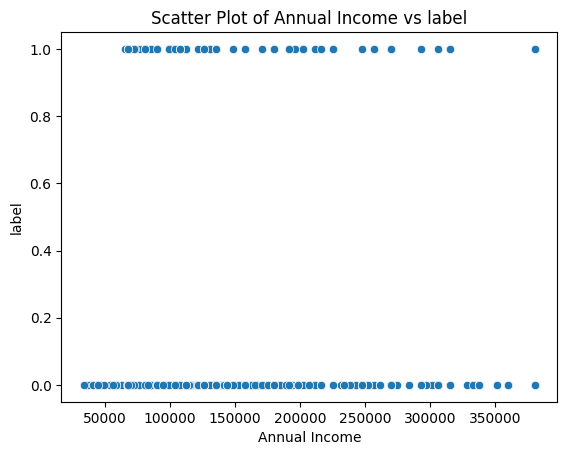

In [123]:
#Scatter Plot of Annual Income vs label
sns.scatterplot(x='Annual_income', y='label', data=df)
plt.title('Scatter Plot of Annual Income vs label')
plt.xlabel('Annual Income')
plt.ylabel('label')

plt.show()

In [124]:
df2=df.copy() #making copy before changing the data

**2. What feature engineering techniques will be relevant to your project?**

ans:Binning or categorization of continuous variable  Annual_income into income brackets.


In [125]:
# Define thresholds for income ranges
low_income_threshold = df2.describe()["Annual_income"]["25%"]
moderate_income_threshold = df2.describe()["Annual_income"]["75%"]


# Define a function to determine income range
def determine_income_range(income):
    if income < low_income_threshold:
        return 'Low Income'
    elif low_income_threshold <= income < moderate_income_threshold:
        return 'Moderate Income'
    else:
        return 'High Income'

# Apply the function to create the new column 'Income_Range'
df2["Annual_Income_Status"]= df2["Annual_income"].apply(determine_income_range)

In [126]:
df2["Annual_Income_Status"].value_counts()

Moderate Income    709
High Income        454
Low Income         378
Name: Annual_Income_Status, dtype: int64

**3. Please justify your data analysis approach.**

ans:
*Hypothesis Testing:* This approach allows us to quantitatively assess the relationship between income and credit approval, providing statistical evidence to support or refuse our hypothesis.

*Feature Engineering:* By transforming and creating new features, we can enhance the predictive power of our models and capture important patterns in the data that may influence credit approval decisions.

Text(0.5, 1.0, 'Countplot for Annual_Income_Status')

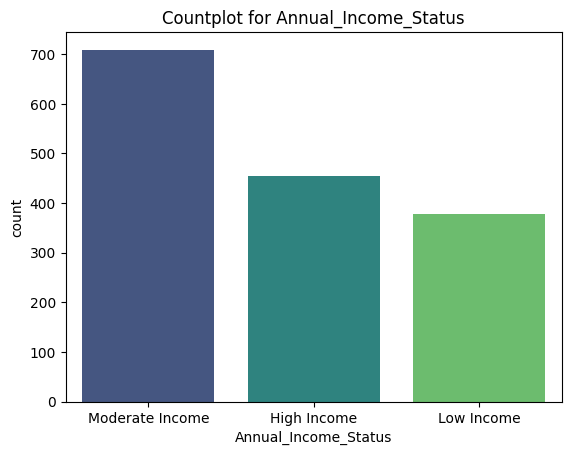

In [127]:
sns.countplot(x=df2["Annual_Income_Status"],palette='viridis')
plt.title('Countplot for Annual_Income_Status')

Text(0.5, 1.0, 'Histogram of label by Annual Income Status ')

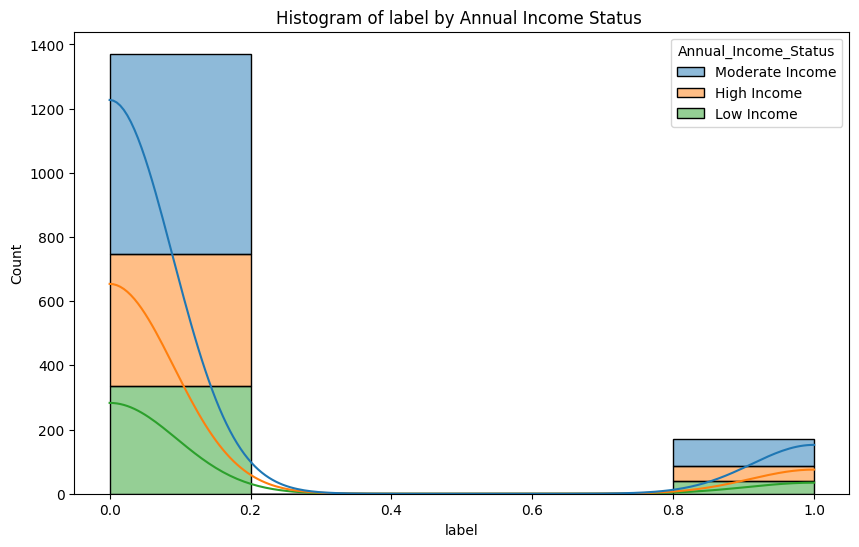

In [128]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='label', hue='Annual_Income_Status',multiple='stack', bins=5, kde=True)
plt.title("Histogram of label by Annual Income Status ")


we can observe that within each income category, there are more approved applications than denied applications. However, the proportion of denied applications appears to be higher in the Low Income category compared to the Moderate and High Income categories. This observation is consistent with our hypothesis, which suggests that there may be a negative correlation between annual income and credit approval.

To further investigate this relationship, we can perform statistical tests such as Pearson's correlation coefficient

In [129]:

# Calculate the Pearson's correlation coefficient between annual income and label
corr, p_value = stats.pearsonr(df['Annual_income'], df['label'])

# Print the correlation coefficient and p-value
print("Correlation coefficient: {:.2f}".format(corr))
print("P-value: {:.2f}".format(p_value))

# Interpret the results
if p_value < 0.05:
    print("The correlation between annual income and credit approval is statistically significant.")
    if corr < 0:
        print("There is a negative correlation, which supports our hypothesis.")
    else:
        print("There is a positive correlation, which contradicts our hypothesis.")
else:
    print("The correlation between annual income and credit approval is not statistically significant.")

Correlation coefficient: 0.01
P-value: 0.69
The correlation between annual income and credit approval is not statistically significant.


The correlation coefficient of 0.01 and a p-value of 0.69 indicate that there is no statistically significant correlation between annual income and credit approval. This means that there is no evidence to support the hypothesis that individuals with lower annual income levels are less likely to have their credit applications approved.

Overall, the lack of correlation between annual income and credit approval suggests that lenders may use a variety of factors to evaluate credit applications, and that annual income alone may not be a strong predictor of credit approval decisions.

In [130]:
def determine_credit_status(row):
    if row["Annual_Income_Status"] =='High Income' and row['Employed_exp'] >= 5 and row['Family_Members'] > 2:
        return 'Good'
    elif row["Annual_Income_Status"] =='Moderate Income' and row['Employed_exp'] >= 2 and row['Family_Members'] > 1:
        return 'Fair'
    elif row["Annual_Income_Status"] =='Moderate Income' and row['Employed_exp'] >= 5 and row['Family_Members'] == 1:
        return 'Good' # Adjusted rule for individuals with  family member =1 and decent employment experience
    elif row['Employed_exp'] >= 10:
        return 'Fair'  # Adjusted rule for individuals with long employment experience
    else:
        return 'Bad'

# Apply the function to create the credit status column
df2['Credit_Status'] = df2.apply(determine_credit_status, axis=1)


In [131]:
df2['Credit_Status'].value_counts()

Bad     851
Fair    553
Good    137
Name: Credit_Status, dtype: int64

Text(0.5, 1.0, 'Countplot for Credit_Status')

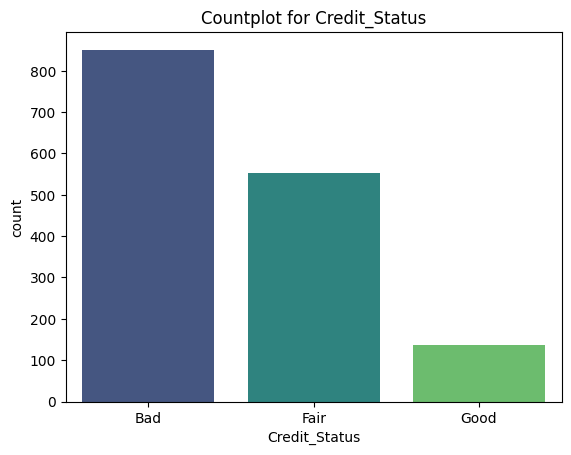

In [132]:
sns.countplot(x=df2["Credit_Status"],palette='viridis')
plt.title('Countplot for Credit_Status')

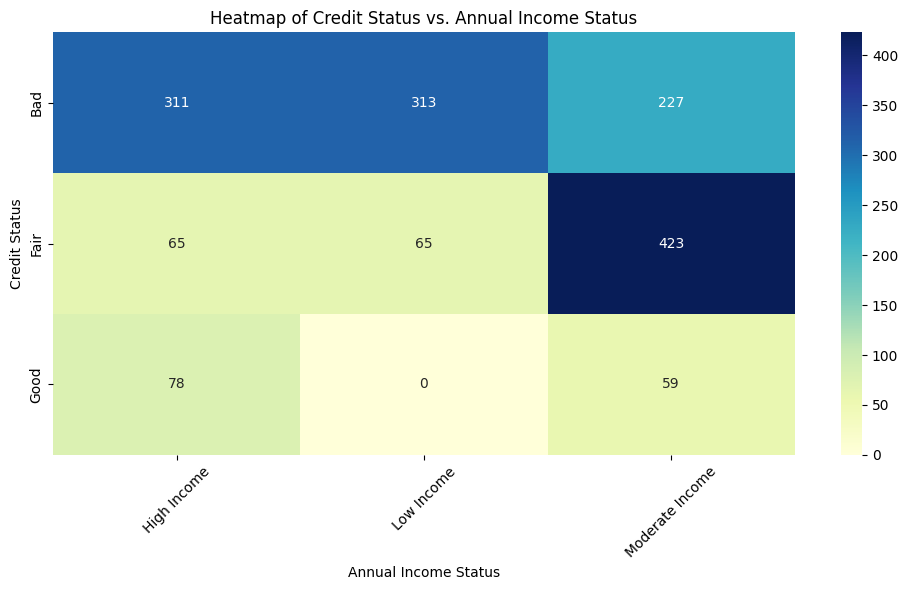

In [133]:
cross_tab = pd.crosstab(df2['Credit_Status'], df2['Annual_Income_Status'])

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('Heatmap of Credit Status vs. Annual Income Status')
plt.xlabel('Annual Income Status')
plt.ylabel('Credit Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Machine Learning Track:**

*Objective:* Perform ML modeling, check assumptions, and justify the chosen model.

**Hypotheses:**

*Logistic Regression Suitability:* We assume that logistic regression will be suitable for binary credit approval prediction due to its interpretability and ability to handle categorical features.

*Justification:* Logistic regression is specifically designed for binary classification tasks and does not assume that the target variable follows a normal distribution. Instead, it models the log odds of the probability of the event occurring (in this case, credit approval).

In [134]:
# removing unused columns
df = df.drop(['Ind_id', 'Mobile_phone','Work_Phone','Phone','Email_id'], axis=1)

In [135]:
df.head()

,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Type_Occupation,Family_Members,label
0,1,1,1,0.0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,0.0,Not-Specified,2.0,1
1,0,1,0,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Not-Specified,2.0,1
2,0,1,0,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,Not-Specified,2.0,1
3,0,1,0,0.0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Not-Specified,2.0,1
4,0,1,0,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Not-Specified,2.0,1




**Feature Engineering**



In [136]:
# converting non numeric to numeric for train and test data
#Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df:
  if df[col].dtype=='object':
    df[col]=le.fit_transform(df[col])

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1541 non-null   int64  
 1   Car_Owner        1541 non-null   int64  
 2   Propert_Owner    1541 non-null   int64  
 3   Children         1541 non-null   float64
 4   Annual_income    1541 non-null   float64
 5   Type_Income      1541 non-null   int64  
 6   Education        1541 non-null   int64  
 7   Marital_status   1541 non-null   int64  
 8   Housing_type     1541 non-null   int64  
 9   Age              1541 non-null   float64
 10  Employed_exp     1541 non-null   float64
 11  Type_Occupation  1541 non-null   int64  
 12  Family_Members   1541 non-null   float64
 13  label            1541 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 180.6 KB


In [138]:
df.shape

(1541, 14)

In [139]:
df["label"].value_counts()

0    1371
1     170
Name: label, dtype: int64

**Model Building**

In [140]:
# feature scaling
# we need to separate independent variables and a dependent variable
X=df.drop(columns="label",axis=1)
y=df["label"]



In [141]:
# split the dataset into train and test
 # 80% train and rest 20 % for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Oversampling**

The distribution of the label variable is imbalanced (i.e., one class significantly outnumbers the other where [0=1371 and 1=170]), we may encounter issues related to model performance. In such cases, sampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) can help balance the classes by oversampling the minority class.

In [142]:
#  SMOTE for oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

**Scaling**

SVM and Logistic Regression models are sensitive to the scale of features. Rescaling the features to a similar range can help these models converge faster and perform better.

*Logistic Regression*:It assumes a linear relationship between the features and the log-odds of the target variable. Scaling the features can help ensure that the assumptions of linearity are met.

*Support Vector Machines:* SVMs use the distance between data points to define the margins and decision boundaries. Rescaling the features ensures that each feature contributes equally to the distance calculation, preventing features with larger scales from dominating the optimization process.

In [143]:
# importing  MinMaxScaler for  SVM and Logistic Regression classifiers
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


**Applying ML algorithm   and finding out, which of these algorithms is best suitable**


*   Logistic Regression

*   Random Forest
*   XGBoost
*   SVM



In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tabulate import tabulate


# Initialize classifiers
log_reg = LogisticRegression()
rf_classifier = RandomForestClassifier()
xgb_classifier = XGBClassifier()
svm_classifier = SVC()



# Initialize classifiers
classifiers = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_classifier,
    'XGBoost': xgb_classifier,
    'SVM': svm_classifier
}


# Store results in a list of lists
results = []

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"Training {name}...")
    if name in ['SVM', 'Logistic Regression']:
        classifier.fit(X_train_resampled_scaled, y_train_resampled)
        y_pred = classifier.predict(X_test_scaled)
    else:
        classifier.fit(X_train_resampled, y_train_resampled)
        y_pred = classifier.predict(X_test)

    # Evaluate performance
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append results to the list
    results.append([name, precision, recall, f1, accuracy, accuracy*100])

# Display results in tabular form
print(tabulate(results, headers=['Classifier', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'Accuracy (%)']))


Training Logistic Regression...
Training Random Forest...
Training XGBoost...
Training SVM...
Classifier             Precision    Recall    F1 Score    Accuracy    Accuracy (%)
-------------------  -----------  --------  ----------  ----------  --------------
Logistic Regression     0.136752  0.551724    0.219178    0.631068         63.1068
Random Forest           0.652174  0.517241    0.576923    0.928803         92.8803
XGBoost                 0.545455  0.413793    0.470588    0.912621         91.2621
SVM                     0.153846  0.413793    0.224299    0.731392         73.1392


Hence we got accuracy on different classification

-logisitic regression got accuracy 63.1%

-Random Forest got accuracy 92.8%

-xg boosting got accuracy 91.2%

-SVM  got accuracy 73.1%


**Random Forest** and **XGBoost** exhibited the highest predictive performance, followed by **SVM** and **Logistic Regression**. **Random Forest** stands out as the top performer with the highest accuracy and strong precision, recall, and F1 score. These results suggest that ensemble methods like **Random Forest** and **XGBoost** are well-suited for credit card approval prediction tasks.

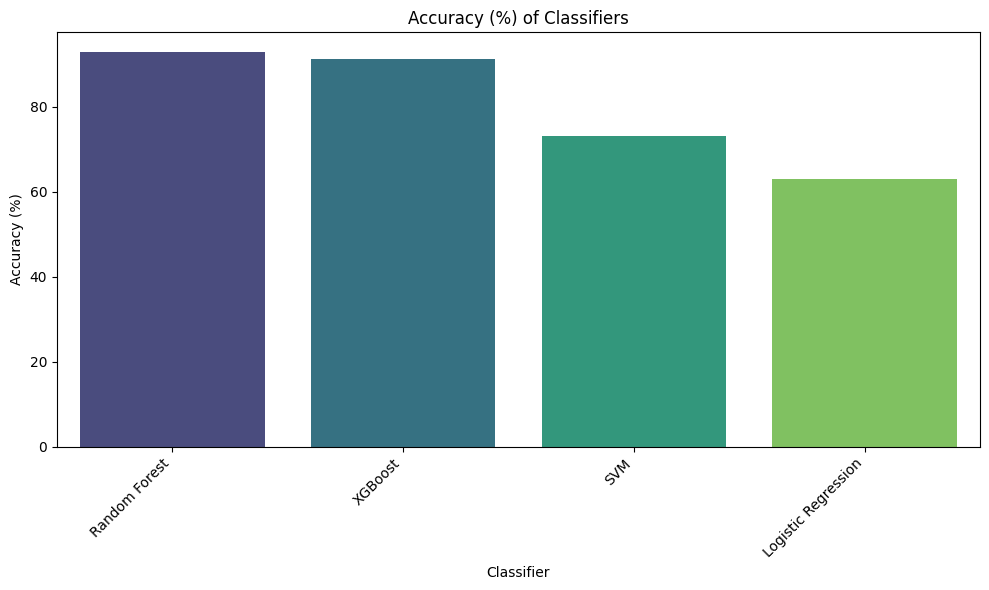

In [145]:
# Creating results  DataFrame
results_df = pd.DataFrame(results, columns=['Classifier', 'Precision', 'Recall', 'F1 Score', 'Accuracy','Accuracy (%)'])
# Sort the DataFrame by accuracy(%) in descending order
results_df = results_df.sort_values(by='Accuracy (%)', ascending=False)

# Plot the accuracy(%)
plt.figure(figsize=(10, 6))
sns.barplot(x="Classifier", y="Accuracy (%)", data=results_df, palette='viridis')
plt.title('Accuracy (%) of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Cross-validation**

 we will now perform Cross-validation ,it will provide a more reliable estimate of a model's performance compared to a single train-test split. It allows us to assess how well the model will generalize to unseen data by averaging its performance metrics across multiple validation sets.

In [146]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# Initialize classifiers
log_reg = LogisticRegression()
rf_classifier = RandomForestClassifier()
xgb_classifier = XGBClassifier()
svm_classifier = SVC()


# Define the number of iterations for cross-validation
num_iterations = 10

# Initialize classifiers
classifiers = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_classifier,
    'XGBoost': xgb_classifier,
    'SVM': svm_classifier
}

# Store results in a list of lists
cv_results = []

# Define ShuffleSplit cross-validation
shuffle_split = ShuffleSplit(n_splits=num_iterations, test_size=0.2, random_state=42)

# Perform cross-validation for each classifier
for name, classifier in classifiers.items():
    print(f"Performing cross-validation for {name}...")
    if name in ['SVM', 'Logistic Regression']:
        cv_scores = cross_val_score(classifier, X_train_resampled_scaled, y_train_resampled, cv=shuffle_split, scoring='accuracy')
    else:
        cv_scores = cross_val_score(classifier, X_train_resampled, y_train_resampled, cv=shuffle_split, scoring='accuracy')
    cv_results.append([name, cv_scores.mean(), cv_scores.std()])

# Display cross-validation results
print(tabulate(cv_results, headers=['Classifier', 'Mean Accuracy', 'Standard Deviation']))

Performing cross-validation for Logistic Regression...
Performing cross-validation for Random Forest...
Performing cross-validation for XGBoost...
Performing cross-validation for SVM...
Classifier             Mean Accuracy    Standard Deviation
-------------------  ---------------  --------------------
Logistic Regression         0.684211            0.0158209
Random Forest               0.948055            0.00793031
XGBoost                     0.941648            0.0140411
SVM                         0.799314            0.0163115


**Random Forest** and **XGBoost** classifiers exhibit the highest mean accuracy scores, indicating superior performance compared to **Logistic Regression** and **SVM** suggesting that they are the most stable and accurate classifiers among the ones evaluated. **Random Forest** has the highest mean accuracy overall, followed closely by **XGBoost**. The standard deviations provide insights into the variability of the model's performance across different splits of the data, with **Random Forest** demonstrating the lowest variability among the classifiers.







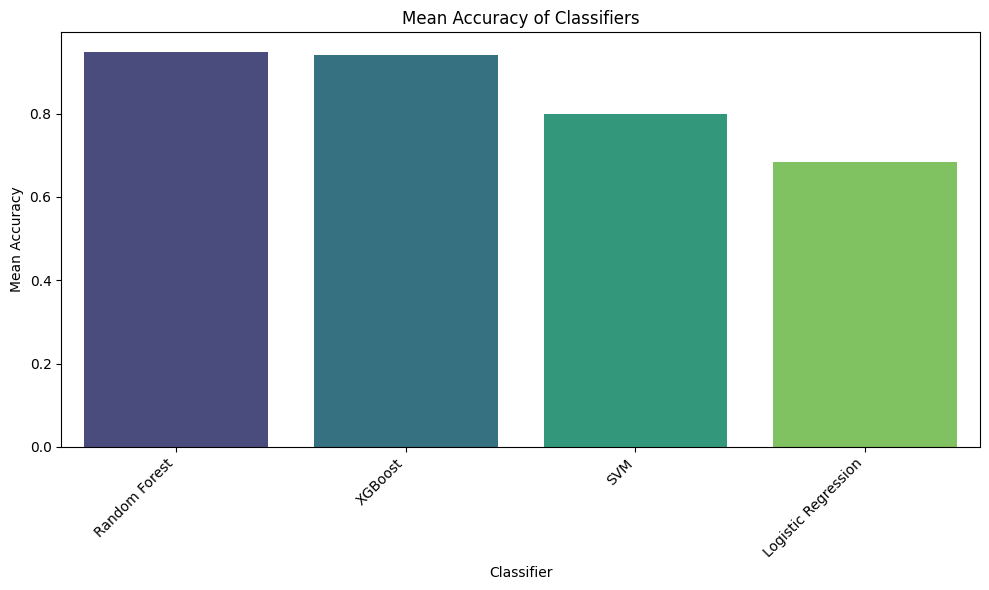

In [147]:
# Creating cross-validation results DataFrame
cv_results_df = pd.DataFrame(cv_results, columns=['Classifier', 'Mean Accuracy', 'Standard Deviation'])

# Sort the DataFrame by Mean Accuracy in descending order
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)

# Plot the Mean Accuracy only
plt.figure(figsize=(10, 6))
sns.barplot(x="Classifier", y="Mean Accuracy", data=cv_results_df, palette='viridis')
plt.title('Mean Accuracy of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Conclusion:

**Statement of Hypothesis:** The initial hypothesis posited that logistic regression would be the most appropriate model for binary credit approval prediction due to its interpretability and ability to handle categorical features.

**Analysis Results:** The analysis, however, contradicted this hypothesis, indicating that Random Forest performed better in terms of accuracy, precision, recall, and F1 score compared to logistic regression.
Despite the initial assumption, the empirical evidence suggests that Random Forest might be better suited for the specific task of binary credit approval prediction based on the dataset and evaluation metrics used.



# **SQL:**

In [148]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ind_id                1541 non-null   int64  
 1   Gender                1541 non-null   int64  
 2   Car_Owner             1541 non-null   int64  
 3   Propert_Owner         1541 non-null   int64  
 4   Children              1541 non-null   float64
 5   Annual_income         1541 non-null   float64
 6   Type_Income           1541 non-null   object 
 7   Education             1541 non-null   object 
 8   Marital_status        1541 non-null   object 
 9   Housing_type          1541 non-null   object 
 10  Age                   1541 non-null   float64
 11  Employed_exp          1541 non-null   float64
 12  Mobile_phone          1541 non-null   int64  
 13  Work_Phone            1541 non-null   int64  
 14  Phone                 1541 non-null   int64  
 15  Email_id             

In [149]:
#  Replacing
mappings = {
    "Gender": {1: "M", 0: "F"},
    "Car_Owner": {1: "Y", 0: "N"},
    "Propert_Owner": {1: "Y", 0: "N"}
}

# Apply replace to DataFrame
for col, mapping in mappings.items():
    df2[col] = df2[col].replace(mapping)


In [150]:

df2.isnull().sum()

Ind_id                  0
Gender                  0
Car_Owner               0
Propert_Owner           0
Children                0
Annual_income           0
Type_Income             0
Education               0
Marital_status          0
Housing_type            0
Age                     0
Employed_exp            0
Mobile_phone            0
Work_Phone              0
Phone                   0
Email_id                0
Type_Occupation         0
Family_Members          0
label                   0
Annual_Income_Status    0
Credit_Status           0
dtype: int64

In [151]:
import duckdb
conn=duckdb.connect()
conn.register("df",df2)
conn.execute("select * from df").fetchdf()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,...,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label,Annual_Income_Status,Credit_Status
0,5008827,M,Y,Y,0.0,180000.00000,Pensioner,Higher education,Married,House / apartment,...,0.0,1,0,0,0,Not-Specified,2.0,1,Moderate Income,Bad
1,5009744,F,Y,N,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,2.0,1,1,1,0,Not-Specified,2.0,1,High Income,Bad
2,5009746,F,Y,N,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,2.0,1,1,1,0,Not-Specified,2.0,1,High Income,Bad
3,5009749,F,Y,N,0.0,191399.32623,Commercial associate,Higher education,Married,House / apartment,...,2.0,1,1,1,0,Not-Specified,2.0,1,Moderate Income,Fair
4,5009752,F,Y,N,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,2.0,1,1,1,0,Not-Specified,2.0,1,High Income,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,5028645,F,N,Y,0.0,191399.32623,Commercial associate,Higher education,Married,House / apartment,...,6.0,1,0,0,0,Managers,2.0,0,Moderate Income,Fair
1537,5023655,F,N,N,0.0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,...,3.0,1,0,0,0,Accountants,1.0,0,High Income,Bad
1538,5115992,M,Y,Y,2.0,180000.00000,Working,Higher education,Married,House / apartment,...,7.0,1,0,0,0,Managers,4.0,0,Moderate Income,Fair
1539,5118219,M,Y,N,0.0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,...,2.0,1,1,1,0,Drivers,2.0,0,High Income,Bad


# 1. Group the customers based on their income type and find the average of their annual income.

In [152]:
conn.execute('''SELECT Type_Income, AVG(Annual_income) AS Average_income
                FROM df
                GROUP BY Type_Income''').fetchdf()

,Type_Income,Average_income
0,Pensioner,151705.984288
1,Working,178328.949168
2,State servant,201286.956522
3,Commercial associate,214626.084093


# 2. Find the female owners of cars and property.

In [153]:
conn.execute('''SELECT *
                FROM df
                WHERE Gender = 'F' AND (Car_Owner = 'Y' AND Propert_Owner = 'Y')''').fetchdf()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,...,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label,Annual_Income_Status,Credit_Status
0,5018498,F,Y,Y,0.0,90000.00000,Working,Secondary / secondary special,Married,House / apartment,...,3.0,1,1,1,0,Cooking staff,2.0,1,Low Income,Bad
1,5018501,F,Y,Y,0.0,191399.32623,Working,Secondary / secondary special,Married,House / apartment,...,3.0,1,1,1,0,Cooking staff,2.0,1,Moderate Income,Fair
2,5018503,F,Y,Y,0.0,90000.00000,Working,Secondary / secondary special,Married,House / apartment,...,3.0,1,1,1,0,Cooking staff,2.0,1,Low Income,Bad
3,5024213,F,Y,Y,0.0,380250.00000,Commercial associate,Higher education,Married,House / apartment,...,1.0,1,0,1,0,Not-Specified,2.0,1,High Income,Bad
4,5036660,F,Y,Y,0.0,76500.00000,Pensioner,Secondary / secondary special,Married,House / apartment,...,0.0,1,0,0,0,Not-Specified,2.0,1,Low Income,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5048458,F,Y,Y,1.0,126000.00000,Working,Higher education,Married,House / apartment,...,0.0,1,0,0,0,Not-Specified,3.0,0,Moderate Income,Bad
173,5023719,F,Y,Y,0.0,175500.00000,Pensioner,Higher education,Married,House / apartment,...,0.0,1,0,1,0,Not-Specified,2.0,0,Moderate Income,Bad
174,5033520,F,Y,Y,2.5,180000.00000,Working,Secondary / secondary special,Married,Municipal apartment,...,16.0,1,0,1,0,Medicine staff,4.5,0,Moderate Income,Fair
175,5024049,F,Y,Y,1.0,144000.00000,Working,Higher education,Married,House / apartment,...,8.0,1,0,0,0,Accountants,3.0,0,Moderate Income,Fair


#3. Find the male customers who are staying with their families.

In [154]:
conn.execute('''SELECT *
                FROM df
                WHERE Gender = 'M' AND Family_Members > 1''').fetchdf()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,...,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label,Annual_Income_Status,Credit_Status
0,5008827,M,Y,Y,0.0,180000.0,Pensioner,Higher education,Married,House / apartment,...,0.0,1,0,0,0,Not-Specified,2.0,1,Moderate Income,Bad
1,5010864,M,Y,Y,1.0,380250.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,2.0,1,0,1,1,Core staff,3.0,1,High Income,Bad
2,5010868,M,Y,Y,1.0,380250.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,2.0,1,0,1,1,Core staff,3.0,1,High Income,Bad
3,5021303,M,N,N,1.0,380250.0,Pensioner,Higher education,Married,With parents,...,3.0,1,0,0,1,Not-Specified,3.0,1,High Income,Bad
4,5021310,M,N,Y,0.0,270000.0,Working,Secondary / secondary special,Married,House / apartment,...,1.0,1,0,0,0,Laborers,2.0,1,High Income,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,5096856,M,Y,Y,0.0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,10.0,1,0,0,0,Drivers,2.0,0,Moderate Income,Fair
466,5090942,M,N,N,0.0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,4.0,1,0,0,0,Low-skill Laborers,2.0,0,High Income,Bad
467,5118268,M,Y,N,1.0,360000.0,State servant,Secondary / secondary special,Married,House / apartment,...,10.0,1,0,1,0,Drivers,3.0,0,High Income,Good
468,5115992,M,Y,Y,2.0,180000.0,Working,Higher education,Married,House / apartment,...,7.0,1,0,0,0,Managers,4.0,0,Moderate Income,Fair


#4. Please list the top five people having the highest income.

In [155]:
conn.execute('''SELECT *
                FROM df
                ORDER BY Annual_income DESC
                LIMIT 5''').fetchdf()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,...,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label,Annual_Income_Status,Credit_Status
0,5010864,M,Y,Y,1.0,380250.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,2.0,1,0,1,1,Core staff,3.0,1,High Income,Bad
1,5010868,M,Y,Y,1.0,380250.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,2.0,1,0,1,1,Core staff,3.0,1,High Income,Bad
2,5010869,M,Y,Y,1.0,380250.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,2.0,1,0,1,1,Core staff,1.0,1,High Income,Bad
3,5021303,M,N,N,1.0,380250.0,Pensioner,Higher education,Married,With parents,...,3.0,1,0,0,1,Not-Specified,3.0,1,High Income,Bad
4,5024213,F,Y,Y,0.0,380250.0,Commercial associate,Higher education,Married,House / apartment,...,1.0,1,0,1,0,Not-Specified,2.0,1,High Income,Bad


#5. How many married people are having bad credit?

In [156]:
conn.execute('''SELECT COUNT(*) AS Married_people_bad_credit_count
                FROM df
                WHERE Marital_status = 'Married' AND Credit_Status = 'Bad' ''').fetchdf()

,Married_people_bad_credit_count
0,515


#6. What is the highest education level and what is the total count?



In [157]:
conn.execute('''SELECT Education , COUNT(*) AS total_count
                FROM df
                GROUP BY Education
                ORDER BY total_count DESC
                LIMIT 1''').fetchdf()


,Education,total_count
0,Secondary / secondary special,1029


#7. Between married males and females, who is having more bad credit?

In [158]:
conn.execute('''SELECT Gender, COUNT(*) AS bad_credit_count
                FROM df
                WHERE Marital_status ='Married' AND Credit_Status = 'Bad'
                GROUP BY Gender''').fetchdf()

,Gender,bad_credit_count
0,M,193
1,F,322
